## 데이터 로드

In [4]:
import sklearn
print(sklearn.__version__)

1.0.2


In [2]:
#데이터 로드
import pandas as pd
sonar = pd.read_csv('./data/sonar.csv', header = None)
sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
# 데이터 분리
datasets = sonar.values
X = datasets[:,:60]
y = datasets[:,60]

In [5]:
# 라벨 인코딩 : 문자열로 된 데이터를 숫자로 변경
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(y)
y = e.transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
# 훈련과 테스트셋을 분리, 데이터 섞어주기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2022)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((145, 60), (63, 60), (145,), (63,))

In [10]:
# 넘파이 배열을 텐서타입으로 바꿔줘야한다 (object to array)
import numpy as np
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

## 모델 정의

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 모델 설계
model1 = Sequential()

# 입력층
model1.add(Dense(units=64, input_dim=60, activation = 'relu'))
# 은닉층
model1.add(Dense(units=120, activation = 'relu'))
model1.add(Dense(units=60, activation = 'relu'))
model1.add(Dense(units=30, activation = 'relu'))
# 출력층
model1.add(Dense(units=1, activation = 'sigmoid'))

#  모델 정보 요약
model1.summary()

Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-02-14 01:55:04.593989: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-14 01:55:04.594084: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3904      
_________________________________________________________________
dense_1 (Dense)              (None, 120)               7800      
_________________________________________________________________
dense_2 (Dense)              (None, 60)                7260      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 20,825
Trainable params: 20,825
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 실행방법 설정
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics = ["accuracy"])

## 모델 학습

### 벨리데이션이 없는데 벨리데이션이 있는 것 처럼 하는 방법 
- 과적합 되는지 학습하면서 확인하는 방법(벨리데이션 줘서 비교)  
     h = model1.fit(X_train, y_train, epochs=100, batch_size=20, validation_split = 0.3)  # 과적합 방지보다는 과적합 되는지 확인하는 용도 

In [11]:
# 벨리데이션 넣은 모델 학습
h = model1.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_test, y_test))

2023-02-14 01:59:50.686360: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-02-14 01:59:50.686555: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-14 01:59:50.843946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 0.6961 - accuracy: 0.4690

2023-02-14 01:59:53.487740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 3s 106ms/step - loss: 0.6961 - accuracy: 0.4690 - val_loss: 0.6857 - val_accuracy: 0.6032
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6777 - accuracy: 0.6828 - val_loss: 0.6770 - val_accuracy: 0.6032
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6690 - accuracy: 0.6414 - val_loss: 0.6433 - val_accuracy: 0.7619
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6500 - accuracy: 0.6897 - val_loss: 0.6470 - val_accuracy: 0.6984
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6281 - accuracy: 0.6966 - val_loss: 0.6055 - val_accuracy: 0.7778
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.5952 - accuracy: 0.7931 - val_loss: 0.6040 - val_accuracy: 0.7143
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 0.5652 - accuracy: 0.7241 - val_loss: 0.5316 - val_accuracy: 0.8254
Epoch 8/100
8/8 [==============

## 학습 모델 시각화

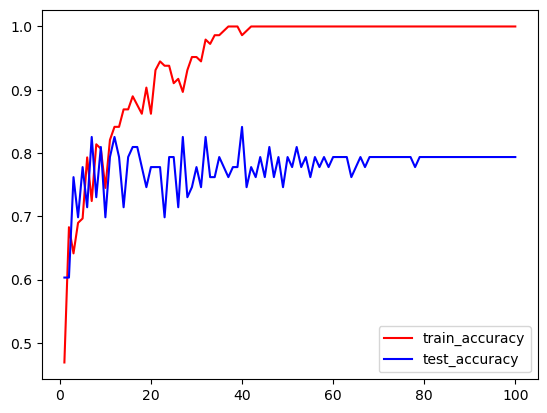

In [13]:
# 벨리데이션 넣은 경우 matplotlib으로 그래프 그리기
import matplotlib.pyplot as plt

# 학습 결과에서 accuracy 값들을 가져온다
accuracy = h.history["accuracy"]
val_accuracy = h.history["val_accuracy"]

# 반복 수
xaxis = range(1, len(accuracy)+1)
plt.plot(xaxis, accuracy, "r", label="train_accuracy")
plt.plot(xaxis, val_accuracy, "b", label="test_accuracy")
plt.legend(loc='lower right')
plt.show()

In [14]:
print(model1.evaluate(X_train, y_train))
print(model1.evaluate(X_test, y_test))

5/5 [==============================] - 0s 11ms/step - loss: 4.8039e-04 - accuracy: 1.0000
[0.00048039297689683735, 1.0]
2/2 [==============================] - 0s 26ms/step - loss: 1.1438 - accuracy: 0.7937
[1.1437594890594482, 0.7936508655548096]


# 과적합 방지

## 드롭아웃
- Dropout : 특정 층에 dropout을 쓰면 특정 층에 있는 노드 중 해당 %만큼을 랜덤하게 사용하지 않도록 해서 학습의 방향을 강제로 틀어서 과적합 방지

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 모델 설계
model2 = Sequential()

# 입력층
model2.add(Dense(units=64, input_dim=60, activation = 'relu'))
# 은닉층
model2.add(Dense(units=120, activation = 'relu'))
model2.add(Dropout(0.3))  # 드랍아웃은 선언 된 위 층에 정의 됨
model2.add(Dense(units=60, activation = 'relu'))
model2.add(Dropout(0.3)) 
model2.add(Dense(units=30, activation = 'relu'))
model2.add(Dropout(0.3)) 
# 출력층
model2.add(Dense(units=1, activation = 'sigmoid'))

#  모델 정보 요약
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                3904      
_________________________________________________________________
dense_6 (Dense)              (None, 120)               7800      
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 60)                7260      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1830      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)               

In [16]:
# 실행방법 설정
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics = ["accuracy"])

In [17]:
# 벨리데이션 넣은 모델 학습
h2 = model2.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/100


2023-02-14 02:03:18.180463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 45ms/step - loss: 0.7118 - accuracy: 0.4621 - val_loss: 0.6886 - val_accuracy: 0.6349
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 0.6885 - accuracy: 0.5379 - val_loss: 0.6912 - val_accuracy: 0.6825


2023-02-14 02:03:18.643170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 3/100
8/8 [==============================] - 0s 15ms/step - loss: 0.6850 - accuracy: 0.5448 - val_loss: 0.6918 - val_accuracy: 0.5397
Epoch 4/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6900 - accuracy: 0.5517 - val_loss: 0.6966 - val_accuracy: 0.4127
Epoch 5/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6825 - accuracy: 0.5724 - val_loss: 0.7060 - val_accuracy: 0.3492
Epoch 6/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6687 - accuracy: 0.6000 - val_loss: 0.7051 - val_accuracy: 0.3651
Epoch 7/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6674 - accuracy: 0.5655 - val_loss: 0.6844 - val_accuracy: 0.5714
Epoch 8/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6408 - accuracy: 0.6414 - val_loss: 0.6896 - val_accuracy: 0.5238
Epoch 9/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6530 - accuracy: 0.6621 - val_loss: 0.6253 - val_accuracy: 0.7302
Epoch 10/100
8/8 [==

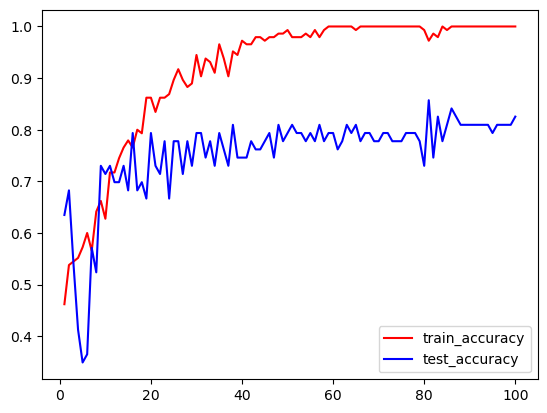

In [18]:
# 벨리데이션 넣은 경우 matplotlib으로 그래프 그리기
import matplotlib.pyplot as plt

# 학습 결과에서 accuracy 값들을 가져온다
accuracy = h2.history["accuracy"]
val_accuracy = h2.history["val_accuracy"]

# 반복 수

xaxis = range(1, len(accuracy)+1)
plt.plot(xaxis, accuracy, "r", label="train_accuracy")
plt.plot(xaxis, val_accuracy, "b", label="test_accuracy")
plt.legend(loc='lower right')

In [19]:
print(model2.evaluate(X_train, y_train))
print(model2.evaluate(X_test, y_test))

5/5 [==============================] - 0s 11ms/step - loss: 0.0015 - accuracy: 1.0000
[0.0014507416635751724, 1.0]
2/2 [==============================] - 0s 26ms/step - loss: 0.6676 - accuracy: 0.8254
[0.6676496863365173, 0.8253968954086304]


## (출력 직전의) 노드 수 줄이기

In [20]:
# 모델 설계
model3 = Sequential()

# 입력층
model3.add(Dense(units=64, input_dim=60, activation = 'relu'))
# 은닉층
model3.add(Dense(units=84, activation = 'relu'))
model3.add(Dense(units=42, activation = 'relu'))
model3.add(Dense(units=21, activation = 'relu'))
# 출력층
model3.add(Dense(units=1, activation = 'sigmoid'))

# 실행방법 설정
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics = ["accuracy"])

# # 벨리데이션 넣은 모델 학습
h3 = model3.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/100
7/8 [=========================>....] - ETA: 0s - loss: 0.6947 - accuracy: 0.5071

2023-02-14 02:04:03.461007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 45ms/step - loss: 0.6947 - accuracy: 0.5034 - val_loss: 0.6807 - val_accuracy: 0.6667
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 0.6795 - accuracy: 0.6138

2023-02-14 02:04:03.771550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 12ms/step - loss: 0.6795 - accuracy: 0.6138 - val_loss: 0.6586 - val_accuracy: 0.7143
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6720 - accuracy: 0.6414 - val_loss: 0.6620 - val_accuracy: 0.7460
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6580 - accuracy: 0.6828 - val_loss: 0.6391 - val_accuracy: 0.7778
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6414 - accuracy: 0.6828 - val_loss: 0.6262 - val_accuracy: 0.8095
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6238 - accuracy: 0.7379 - val_loss: 0.6213 - val_accuracy: 0.7778
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 0.5904 - accuracy: 0.7655 - val_loss: 0.5707 - val_accuracy: 0.7778
Epoch 8/100
8/8 [==============================] - 0s 14ms/step - loss: 0.5456 - accuracy: 0.8000 - val_loss: 0.6018 - val_accuracy: 0.6349
Epoch 9/100
8/8 [===============

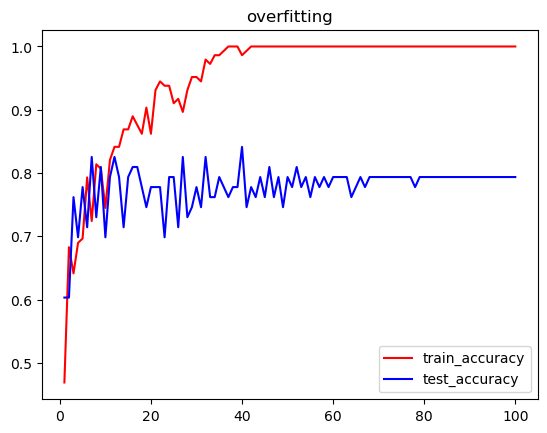

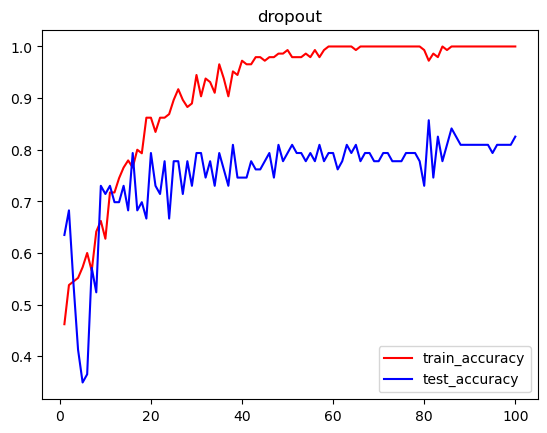

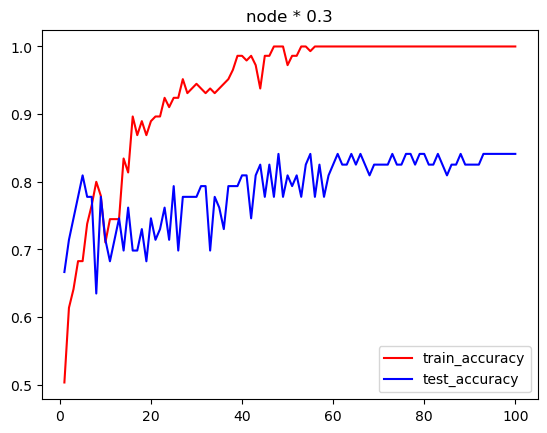

In [21]:
# 벨리데이션 넣은 경우 matplotlib으로 그래프 그리기
import matplotlib.pyplot as plt

# 학습 결과에서 accuracy 값들을 가져온다
accuracy = h.history["accuracy"]
val_accuracy = h.history["val_accuracy"]

# 반복 수
xaxis = range(1, len(accuracy)+1) 
plt.plot(xaxis, accuracy, "r", label="train_accuracy")
plt.plot(xaxis, val_accuracy, "b", label="test_accuracy")
plt.legend(loc='lower right')
plt.title("overfitting")
plt.show()

# 학습 결과에서 accuracy 값들을 가져온다
accuracy2 = h2.history["accuracy"]
val_accuracy2 = h2.history["val_accuracy"]

# 반복 수
xaxis = range(1, len(accuracy)+1)
plt.plot(xaxis, accuracy2, "r", label="train_accuracy")
plt.plot(xaxis, val_accuracy2, "b", label="test_accuracy")
plt.legend(loc='lower right')
plt.title("dropout")
plt.show()

# 학습 결과에서 accuracy 값들을 가져온다
accuracy3 = h3.history["accuracy"]
val_accuracy3 = h3.history["val_accuracy"]

# 반복 수
xaxis = range(1, len(accuracy)+1)
plt.plot(xaxis, accuracy3, "r", label="train_accuracy")
plt.plot(xaxis, val_accuracy3, "b", label="test_accuracy")
plt.legend(loc='lower right')
plt.title("node * 0.3")
plt.show()
